<a href="https://colab.research.google.com/github/ErikFolkesson/nn_from_scratch_python/blob/main/Colab_Housing_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ErikFolkesson/nn_from_scratch_python.git

Cloning into 'nn_from_scratch_python'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 109 (delta 46), reused 79 (delta 23), pack-reused 0
Receiving objects: 100% (109/109), 993.15 KiB | 13.99 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
%cd nn_from_scratch_python

/content/nn_from_scratch_python


In [3]:
from neural_network.network import Network
from neural_network.layers import Dense
from neural_network.cost import Cost
from neural_network.optimizer import Optimizer

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = 'data/housing.csv'
data = pd.read_csv(file_path)

data = data.dropna()
data = data.drop(columns=['longitude', 'latitude', 'ocean_proximity'])

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_Y = StandardScaler()
Y = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

In [5]:
network = Network(
    layers=[
        Dense(X.shape[1], 10, "relu"),
        Dense(10, 10, "relu"),
        Dense(10, 1, "none")
    ],
    cost=Cost("MSE")
)

In [6]:
training_progress = network.train(X, Y, 15000, learning_rate=0.005, validation_split=0.2, verbose=True, verbose_percentage=10)

[--------------------] Progress: 0.0% - Epoch 0/15000 - Loss: 103.3141 - Validation Loss: 6.9016


[==------------------] Progress: 10.0% - Epoch 1500/15000 - Loss: 0.4435 - Validation Loss: 0.4518


[====----------------] Progress: 20.0% - Epoch 3000/15000 - Loss: 0.4192 - Validation Loss: 0.4241


[======--------------] Progress: 30.0% - Epoch 4500/15000 - Loss: 0.4047 - Validation Loss: 0.4161


[========------------] Progress: 40.0% - Epoch 6000/15000 - Loss: 0.3948 - Validation Loss: 0.4076


[==========----------] Progress: 50.0% - Epoch 7500/15000 - Loss: 0.3883 - Validation Loss: 0.3982


[============--------] Progress: 60.0% - Epoch 9000/15000 - Loss: 0.3838 - Validation Loss: 0.3919


[==============------] Progress: 70.0% - Epoch 10500/15000 - Loss: 0.3799 - Validation Loss: 0.3871


[================----] Progress: 80.0% - Epoch 12000/15000 - Loss: 0.3760 - Validation Loss: 0.3823


[==================--] Progress: 90.0% - Epoch 13500/15000 - Loss: 0.3721 - Validation Loss

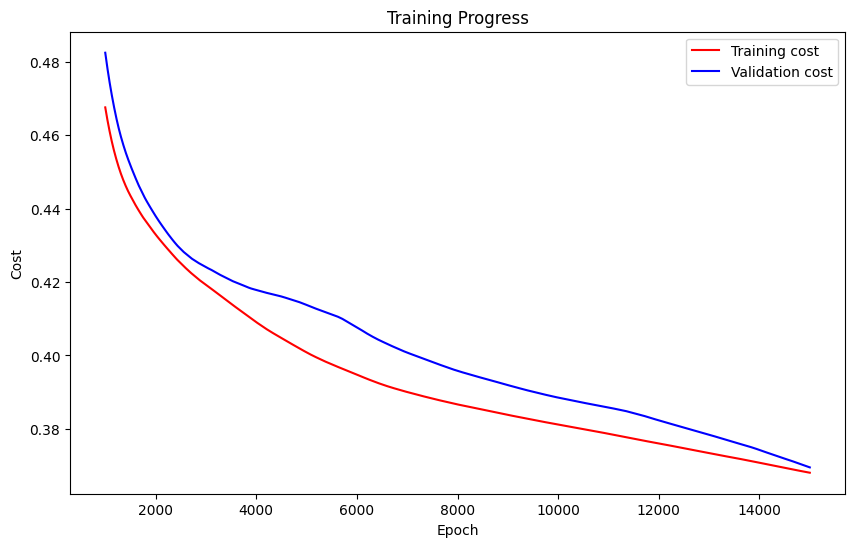

In [7]:
import matplotlib.pyplot as plt

ignore_first_n = 1000

costs = training_progress['cost'][ignore_first_n:]
val_costs = training_progress['val_cost'][ignore_first_n:]

plt.figure(figsize=(10, 6))
plt.plot(range(ignore_first_n, len(costs) + ignore_first_n), costs, 'r-', label='Training cost')
plt.plot(range(ignore_first_n, len(val_costs) + ignore_first_n), val_costs, 'b-', label='Validation cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.legend()
plt.show()